In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from datetime import datetime   

<h1> Extraccion de datos a partir de Yahoo Finances </h1>

In [5]:
#Buscamos datos de SP500 y MELI

#Fechas de inicio y fin
start_data = '2022-01-01'
end_data = str(datetime.now().year) + "-" + str(datetime.now().month) + "-" + str(datetime.now().day)

#Periocidad a rescatar
periocidad = "1wk"

#Etiquetas correspondiente al SP500
lista_etiquetas = ["^GSPC","MELI","AAPL","AMZN","KO","GOOG"]

#Dataframe que contendra los datos a recoletar
datos_concatenados = pd.DataFrame()

#Recorremos la lista de etiquetas/simbolos para rescatar los datos que nos interesan
#Almacenamos todos los datos en un dataframe auxiliar y luego lo pasamos al general
for etiqueta in lista_etiquetas:

    df_aux = yf.download(etiqueta,start=start_data,end=end_data, interval = periocidad)
    datos_concatenados[etiqueta] = df_aux['Close']

#Borramos el indice
datos_concatenados = datos_concatenados.reset_index(drop=True)

#Cambiamos el nombre de la primera columna, por uno mas descriptivos
datos_concatenados = datos_concatenados.rename(columns= {"^GSPC":"SP500"})

print(datos_concatenados)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


           SP500         MELI        AAPL        AMZN         KO        GOOG
0    4677.029785  1085.359985  172.169998  162.554001  60.330002  137.004501
1    4662.850098  1122.739990  173.070007  162.138000  61.389999  139.786499
2    4397.939941  1052.560059  162.410004  142.643005  60.450001  130.091995
3    4431.850098  1048.630005  170.330002  143.977997  60.840000  133.289505
4    4500.529785  1035.329956  172.389999  157.639496  60.959999  143.016006
..           ...          ...         ...         ...        ...         ...
101  4719.189941  1606.189941  197.570007  149.970001  58.599998  133.839996
102  4754.629883  1589.079956  193.600006  153.419998  58.320000  142.720001
103  4769.830078  1571.540039  192.529999  151.940002  58.930000  140.929993
104  4697.240234  1538.829956  181.179993  145.240005  59.669998  137.389999
105  4783.830078  1658.579956  185.919998  154.619995  60.389999  144.240005

[106 rows x 6 columns]


<h1> Estudio de Correlaccion y Covarianza </h1>

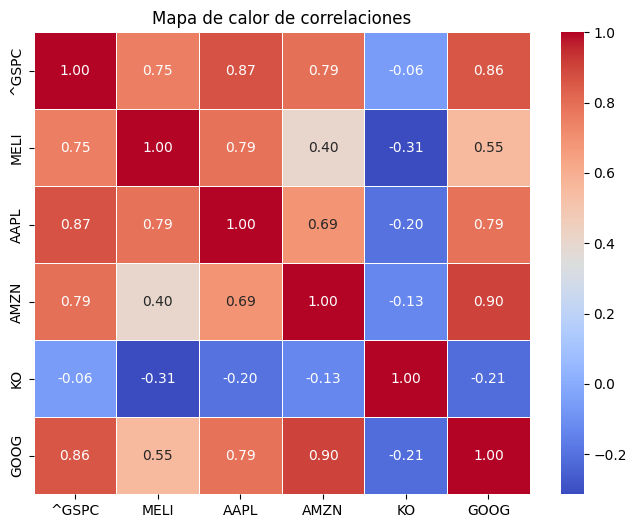

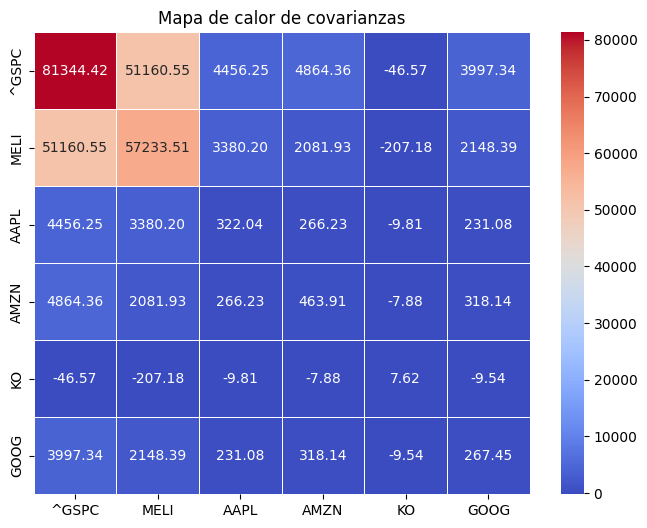

In [3]:
# Calcular la matriz de correlación
correlation_matrix = datos_concatenados.corr(method='pearson')

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor de correlaciones')
plt.show()


# Calcular la matriz de covarianza
covarianza_matrix = datos_concatenados.cov()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(covarianza_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor de covarianzas')
plt.show()


<h1> Similitud del Coseno </h1>

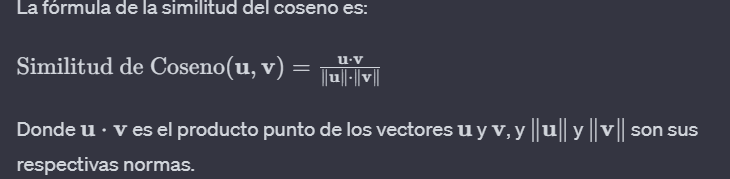


In [7]:
#==== Buscamos conocer la similitud del coseno entre el SP500 y cada accion

#Norma del vector del SP500
norma_sp500 = np.linalg.norm(datos_concatenados['SP500'])

for etiqueta in lista_etiquetas:

    if etiqueta == "^GSPC": #--> Nos salteamos el SP500 ya lo comparariamos consigo mismo
        continue
    else:

        #Calculamos producto punto
        producto_punto = np.dot(datos_concatenados['SP500'],datos_concatenados[etiqueta])

        #Norma del vector a comparar
        norma_etiqueta = np.linalg.norm(datos_concatenados[etiqueta])

        #Calculamos la similitud del coseno: (producto_punto_sp500 * producto_punto_accion) / (norma_sp500 * norma_accion)
        similitud_coseno = producto_punto / (norma_sp500 * norma_etiqueta)
        print(f"La similitud entre el SP500 y {etiqueta}: {similitud_coseno} ")



La similitud entre el SP500 y MELI: 0.986080349017566 
La similitud entre el SP500 y AAPL: 0.9982159988558605 
La similitud entre el SP500 y AMZN: 0.9922530672638351 
La similitud entre el SP500 y KO: 0.9965292210962985 
La similitud entre el SP500 y GOOG: 0.996238923719377 


<h1>Proyeccion escalar tomando como vector de referencia al SP500</h1>

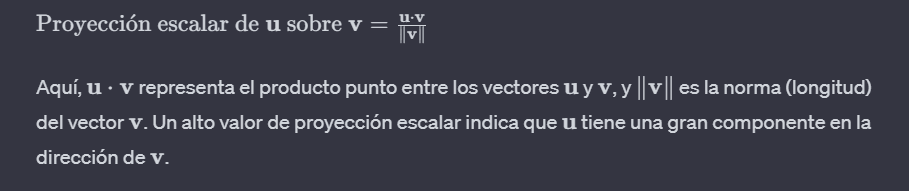

In [21]:

#Vector base a comprar
v = datos_concatenados['SP500']

for columna in datos_concatenados.columns:
        
    proyecciones_escalares = np.dot(datos_concatenados[columna],datos_concatenados['SP500']) / np.linalg.norm(datos_concatenados['SP500'])

    print(f"La proyeccion escalar de {columna} respecto al SP500  es: {proyecciones_escalares}")

La proyeccion escalar de SP500 respecto al SP500  es: 43353.41719993885
La proyeccion escalar de MELI respecto al SP500  es: 11507.136657500989
La proyeccion escalar de AAPL respecto al SP500  es: 1695.7541173869972
La proyeccion escalar de AMZN respecto al SP500  es: 1286.6700085779653
La proyeccion escalar de KO respecto al SP500  es: 624.5606651352861
La proyeccion escalar de GOOG respecto al SP500  es: 1219.3091142811568
